In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import powerlaw as pl

In [19]:
# change defaults to be less ugly
mpl.rc('xtick', labelsize=14, color="#222222") 
mpl.rc('ytick', labelsize=14, color="#222222") 
mpl.rc('font', **{'family':'sans-serif','sans-serif':['Arial']})
mpl.rc('font', size=24)
mpl.rc('xtick.major', size=6, width=1)
mpl.rc('xtick.minor', size=3, width=1)
mpl.rc('ytick.major', size=6, width=1)
mpl.rc('ytick.minor', size=3, width=1)
mpl.rc('axes', linewidth=1, edgecolor="#222222", labelcolor="#222222")
mpl.rc('text', usetex=False, color="#222222")

In [4]:
#Import the EdgeList and define function get_graph

txt_in = open("EdgeList.txt", "r") #the input txt file
EdgeList = []

#store data in EdgeList from txt_in
content = txt_in.read()
lines = content.split('\n')
del lines[0]
for l in lines: 
    EdgeList.append(l.split('\t'))
del EdgeList[-1]

def get_graph(EdgeList, YearList):
    G = nx.DiGraph()
    for y in YearList:
        for i in range(len(EdgeList)):
            year = EdgeList[i][3].split('.')[0]
            if year == str(y):
                if G.has_edge(EdgeList[i][0], EdgeList[i][1]):
                    G.edge[EdgeList[i][0]][EdgeList[i][1]]['loses'] += 1
                else:
                    G.add_edge(EdgeList[i][0], EdgeList[i][1], loses = 1)
    return G

In [5]:
G1506 = get_graph(EdgeList, range(2015, 2005, -1))
G0596 = get_graph(EdgeList, range(2005, 1995, -1))
G9586 = get_graph(EdgeList, range(1995, 1985, -1))
G8576 = get_graph(EdgeList, range(1985, 1975, -1))

In [6]:
def in_degree_seq(G, weight):
    return G.in_degree(weight = weight).values()

def out_degree_seq(G, weight):
    return G.out_degree(weight = weight).values()

In [7]:
def find_nodes_by_in_degree(G, weight, degree): 
    nodes = []
    for node in G.nodes_iter():
        if G.in_degree(node, weight = weight) == degree:
            nodes.append(node)
    return nodes

def find_nodes_by_out_degree(G, weight, degree): 
    nodes = []
    for node in G.nodes_iter():
        if G.out_degree(node, weight = weight) == degree:
            nodes.append(node)
    return nodes

In [17]:
def distro_linear_binning(data):
    positive_data = []
    for d in data:
        if d > 0: 
            positive_data.append(d)
    
    bins = [n + 0.5 for n in range(min(positive_data)-1, max(positive_data)+1)]
    frequency, _ = np.histogram(positive_data, bins)
    density = [freq / float(len(positive_data)) for freq in frequency]
    x = range(min(positive_data), max(positive_data)+1)
    return x, density

def distro_log_binning(data, bin_num):
    positive_data = []
    for d in data:
        if d > 0: 
            positive_data.append(d)
    
    bin_breaks = np.logspace(np.log10(min(positive_data)), np.log10(max(positive_data)), num = bin_num)
    density, _ = np.histogram(positive_data, bin_breaks, density = True)
    log_bb = np.log10(bin_breaks)
    x = 10**((log_bb[:-1] + log_bb[1:])/2)
    return x, density

def fraction_zero(data):
    return (len(data) - np.count_nonzero(data)) / float(len(data))

In [11]:
'''
Return the degree exponent of the fitting line, and the fitting with appropriate range. 
'''

def fitting_line(fit):
    kmin = fit.xmin
    X, _ = fit.pdf()
    '''for x in X: 
        if x < kmin: 
            del x
    '''
    gamma = fit.alpha
    Y = (gamma-1) * kmin**(gamma-1) * X**(-gamma)
    return X, Y, gamma

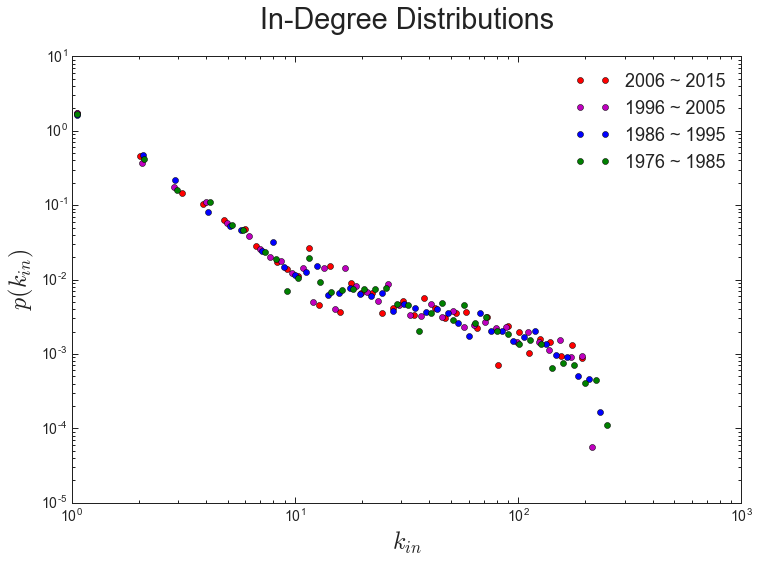

Fraction of zero in-degree: 

2006~2015: 0.228260869565
1996~2005: 0.223819301848
1986~1995: 0.198800342759
1976~1985: 0.287194670614


In [38]:
'''in-degree distribution'''
fig = plt.figure(figsize=(12,8))

#2006-2015
x1, density1 = distro_log_binning(in_degree_seq(G1506, 'None'), 50)
plt.loglog(x1, density1, marker='o', color='r', linestyle='None', label='2006 ~ 2015')

#1996-2005
x2, density2 = distro_log_binning(in_degree_seq(G0596, 'None'), 50)
plt.loglog(x2, density2, marker='o', color='m', linestyle='None', label='1996 ~ 2005')

#1986-1995
x3, density3 = distro_log_binning(in_degree_seq(G9586, 'None'), 50)
plt.loglog(x3, density3, marker='o', color='blue', linestyle='None', label='1986 ~ 1995')

#1976-1985
x4, density4 = distro_log_binning(in_degree_seq(G8576, 'None'), 50)
plt.loglog(x4, density4, marker='o', color='green', linestyle='None', label='1976 ~ 1985')

plt.legend(frameon=False, prop={'size':18})
plt.title('In-Degree Distributions', y=1.05)
plt.xlabel('$k_{in}$')
plt.ylabel('$p(k_{in})$')

plt.show()
z1 = fraction_zero(in_degree_seq(G1506, 'None'))
z2 = fraction_zero(in_degree_seq(G0596, 'None'))
z3 = fraction_zero(in_degree_seq(G9586, 'None'))
z4 = fraction_zero(in_degree_seq(G8576, 'None'))
print "Fraction of zero in-degree: \n"
print "2006~2015: {0}\n1996~2005: {1}\n1986~1995: {2}\n1976~1985: {3}".format(z1, z2, z3, z4)

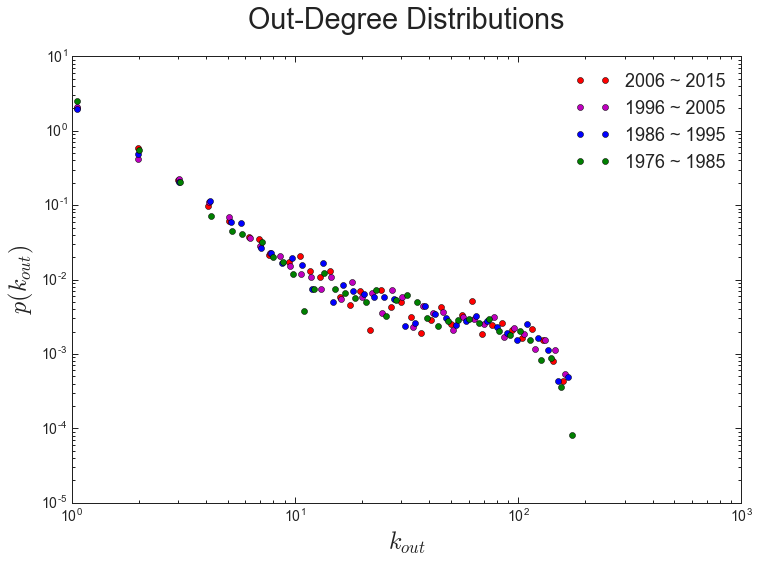

Fraction of zero out-degree: 

2006~2015: 0.0
1996~2005: 0.0
1986~1995: 0.0
1976~1985: 0.0


In [39]:
'''out-degree distribution'''
fig = plt.figure(figsize=(12,8))

#2006-2015
x1, density1 = distro_log_binning(out_degree_seq(G1506, 'None'), 50)
plt.loglog(x1, density1, marker='o', color='r', linestyle='None', label='2006 ~ 2015')

#1996-2005
x2, density2 = distro_log_binning(out_degree_seq(G0596, 'None'), 50)
plt.loglog(x2, density2, marker='o', color='m', linestyle='None', label='1996 ~ 2005')

#1986-1995
x3, density3 = distro_log_binning(out_degree_seq(G9586, 'None'), 50)
plt.loglog(x3, density3, marker='o', color='blue', linestyle='None', label='1986 ~ 1995')

#1976-1985
x4, density4 = distro_log_binning(out_degree_seq(G8576, 'None'), 50)
plt.loglog(x4, density4, marker='o', color='green', linestyle='None', label='1976 ~ 1985')

plt.legend(frameon=False, prop={'size':18})
plt.title('Out-Degree Distributions', y=1.05)
plt.xlabel('$k_{out}$')
plt.ylabel('$p(k_{out})$')

plt.show()
z1 = fraction_zero(out_degree_seq(G1506, 'None'))
z2 = fraction_zero(out_degree_seq(G0596, 'None'))
z3 = fraction_zero(out_degree_seq(G9586, 'None'))
z4 = fraction_zero(out_degree_seq(G8576, 'None'))
print "Fraction of zero out-degree: \n"
print "2006~2015: {0}\n1996~2005: {1}\n1986~1995: {2}\n1976~1985: {3}".format(z1, z2, z3, z4)

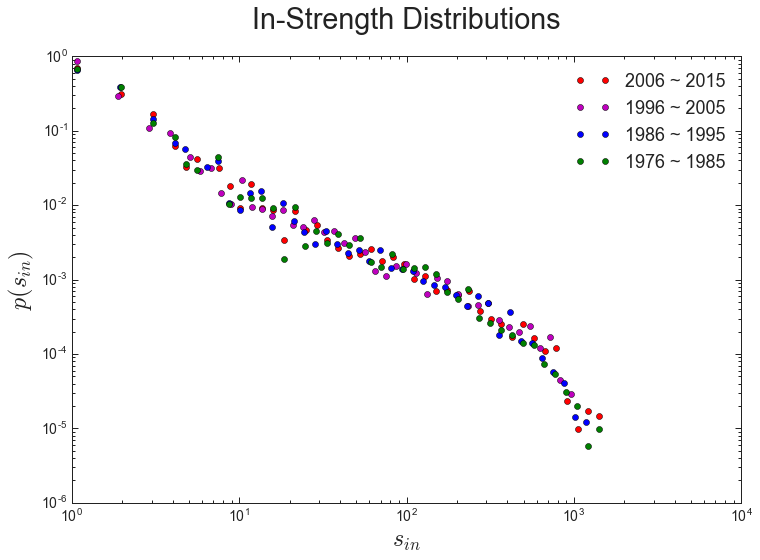

Fraction of zero in-strength: 

2006~2015: 0.228260869565
1996~2005: 0.223819301848
1986~1995: 0.198800342759
1976~1985: 0.287194670614


In [34]:
'''in-strength distribution'''
fig = plt.figure(figsize=(12,8))

#2006-2015
x1, density1 = distro_log_binning(in_degree_seq(G1506, 'loses'), 50)
plt.loglog(x1, density1, marker='o', color='r', linestyle='None', label='2006 ~ 2015')

'''
#fitting
fit1 = pl.Fit(in_degree_seq(G1506, 'loses'))
X1, Y1, gamma1 = fitting_line(fit1)
plt.loglog(X1, Y1, color='m', linestyle='--', label='$\gamma = {}$'.format(round(gamma1, 2)))
'''

#1996-2005
x2, density2 = distro_log_binning(in_degree_seq(G0596, 'loses'), 50)
plt.loglog(x2, density2, marker='o', color='m', linestyle='None', label='1996 ~ 2005')

#1986-1995
x3, density3 = distro_log_binning(in_degree_seq(G9586, 'loses'), 50)
plt.loglog(x3, density3, marker='o', color='blue', linestyle='None', label='1986 ~ 1995')

#1976-1985
x4, density4 = distro_log_binning(in_degree_seq(G8576, 'loses'), 50)
plt.loglog(x4, density4, marker='o', color='green', linestyle='None', label='1976 ~ 1985')

plt.legend(frameon=False, prop={'size':18})
plt.title('In-Strength Distributions', y=1.05)
plt.xlabel('$s_{in}$')
plt.ylabel('$p(s_{in})$')

plt.show()
z1 = fraction_zero(in_degree_seq(G1506, 'loses'))
z2 = fraction_zero(in_degree_seq(G0596, 'loses'))
z3 = fraction_zero(in_degree_seq(G9586, 'loses'))
z4 = fraction_zero(in_degree_seq(G8576, 'loses'))
print "Fraction of zero in-strength: \n"
print "2006~2015: {0}\n1996~2005: {1}\n1986~1995: {2}\n1976~1985: {3}".format(z1, z2, z3, z4)

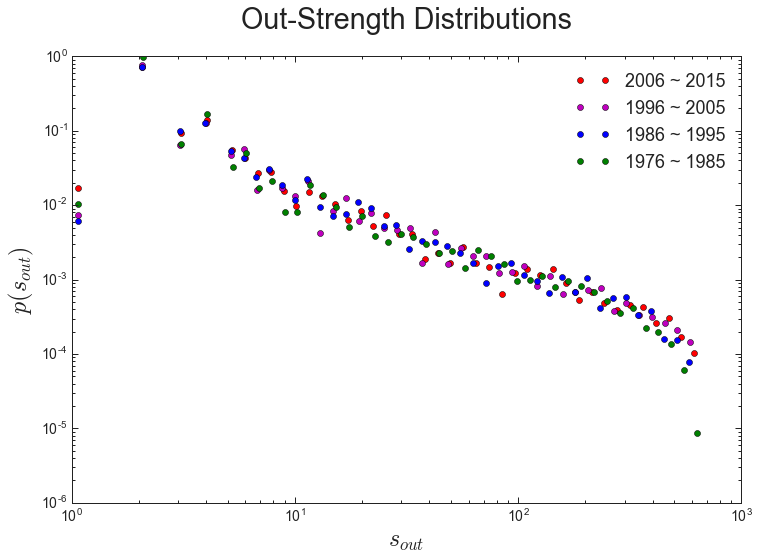

Fraction of zero out-strength: 

2006~2015: 0.0
1996~2005: 0.0
1986~1995: 0.0
1976~1985: 0.0


In [35]:
'''out-strength distribution'''
fig = plt.figure(figsize=(12,8))

#2006-2015
x1, density1 = distro_log_binning(out_degree_seq(G1506, 'loses'), 50)
plt.loglog(x1, density1, marker='o', color='r', linestyle='None', label='2006 ~ 2015')

#1996-2005
x2, density2 = distro_log_binning(out_degree_seq(G0596, 'loses'), 50)
plt.loglog(x2, density2, marker='o', color='m', linestyle='None', label='1996 ~ 2005')

#1986-1995
x3, density3 = distro_log_binning(out_degree_seq(G9586, 'loses'), 50)
plt.loglog(x3, density3, marker='o', color='blue', linestyle='None', label='1986 ~ 1995')

#1976-1985
x4, density4 = distro_log_binning(out_degree_seq(G8576, 'loses'), 50)
plt.loglog(x4, density4, marker='o', color='green', linestyle='None', label='1976 ~ 1985')

plt.legend(frameon=False, prop={'size':18})
plt.title('Out-Strength Distributions', y=1.05)
plt.xlabel('$s_{out}$')
plt.ylabel('$p(s_{out})$')

plt.show()
z1 = fraction_zero(out_degree_seq(G1506, 'loses'))
z2 = fraction_zero(out_degree_seq(G0596, 'loses'))
z3 = fraction_zero(out_degree_seq(G9586, 'loses'))
z4 = fraction_zero(out_degree_seq(G8576, 'loses'))
print "Fraction of zero out-strength: \n"
print "2006~2015: {0}\n1996~2005: {1}\n1986~1995: {2}\n1976~1985: {3}".format(z1, z2, z3, z4)

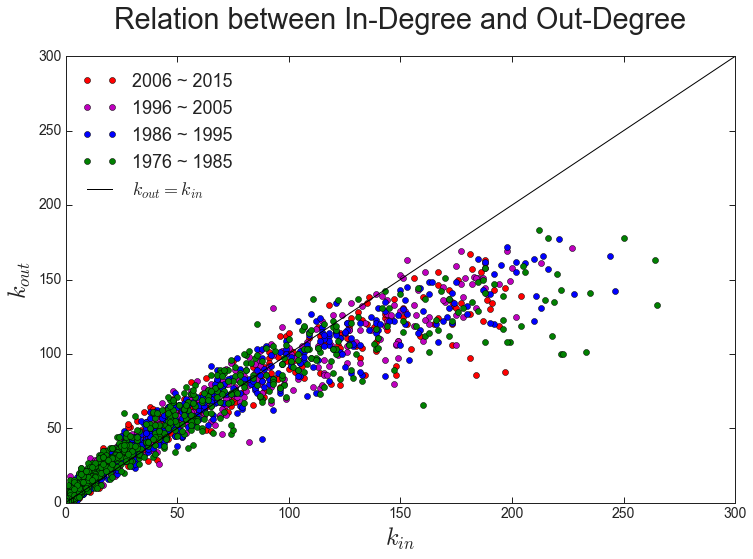

In [51]:
'''in-degree and out-degree relation'''
fig = plt.figure(figsize=(12,8))

x1 = in_degree_seq(G1506, 'None')
y1 = out_degree_seq(G1506, 'None')
plt.plot(x1, y1, marker='o', color='r', linestyle='None', label='2006 ~ 2015')

x2 = in_degree_seq(G0596, 'None')
y2 = out_degree_seq(G0596, 'None')
plt.plot(x2, y2, marker='o', color='m', linestyle='None', label='1996 ~ 2005')

x3 = in_degree_seq(G9586, 'None')
y3 = out_degree_seq(G9586, 'None')
plt.plot(x3, y3, marker='o', color='blue', linestyle='None', label='1986 ~ 1995')

x4 = in_degree_seq(G8576, 'None')
y4 = out_degree_seq(G8576, 'None')
plt.plot(x4, y4, marker='o', color='green', linestyle='None', label='1976 ~ 1985')

x = [0, 300]
y = x
plt.plot(x, y, color='black', linestyle='-', label='$k_{out} = k_{in}$')

plt.legend(frameon=False, prop={'size':18}, loc=2)
plt.title('Relation between In-Degree and Out-Degree', y=1.05)
plt.xlabel('$k_{in}$')
plt.ylabel('$k_{out}$')

plt.show()

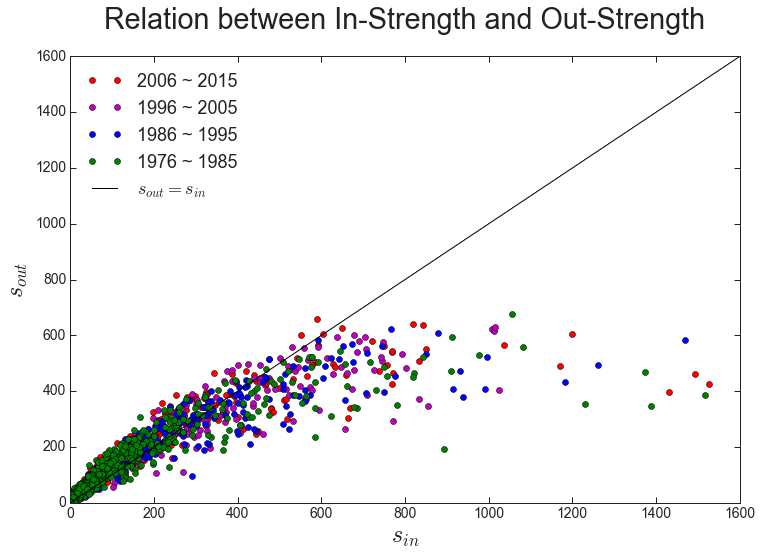

In [53]:
'''in-strength and out-strength relation'''
fig = plt.figure(figsize=(12,8))

x1 = in_degree_seq(G1506, 'loses')
y1 = out_degree_seq(G1506, 'loses')
plt.plot(x1, y1, marker='o', color='r', linestyle='None', label='2006 ~ 2015')

x2 = in_degree_seq(G0596, 'loses')
y2 = out_degree_seq(G0596, 'loses')
plt.plot(x2, y2, marker='o', color='m', linestyle='None', label='1996 ~ 2005')

x3 = in_degree_seq(G9586, 'loses')
y3 = out_degree_seq(G9586, 'loses')
plt.plot(x3, y3, marker='o', color='blue', linestyle='None', label='1986 ~ 1995')

x4 = in_degree_seq(G8576, 'loses')
y4 = out_degree_seq(G8576, 'loses')
plt.plot(x4, y4, marker='o', color='green', linestyle='None', label='1976 ~ 1985')

x = [0, 1600]
y = x
plt.plot(x, y, color='black', linestyle='-', label='$s_{out} = s_{in}$')

plt.legend(frameon=False, prop={'size':18}, loc=2)
plt.title('Relation between In-Strength and Out-Strength', y=1.05)
plt.xlabel('$s_{in}$')
plt.ylabel('$s_{out}$')

plt.show()

In [133]:
'''degree(strength) correlation
return a list of degree k and a list of the average k_nn(k_i) for k_i = k 
'''

def average_neighbor_degree(G, target, node, weight):
    #source = 'in' or 'out'
    #target = 'in' or 'out'
    target_degree = G.degree
    if G.is_directed():
        direction = {'out': G.out_degree, 'in': G.in_degree}
        target_degree = direction[target]
    
    import numpy as np
    deg = float(len(G[node]))
    if deg == 0: # prevent normalization by 0
        deg = 1
    return sum(target_degree(G[node], weight=weight).values()) / deg
    

def degree_correlation_fuction(G, source, target, weight):
    #source = 'in' or 'out'
    #target = 'in' or 'out'
    source_degree = G.degree
    if G.is_directed():
        direction = {'out': G.out_degree, 'in': G.in_degree}
        source_degree = direction[source]
    
    K= []
    Knn_seq = []
    for node in G.nodes_iter():
        k = source_degree(node)
        knn = average_neighbor_degree(G, target=target, node=node, weight=weight)
        if k in K: 
            i = K.index(k)
            Knn_seq[i].append(knn)
        else: 
            K.append(k)
            Knn_seq.append([knn])
    
    import numpy as np
    Knn = [np.average(x) for x in Knn_seq]
    return K, Knn

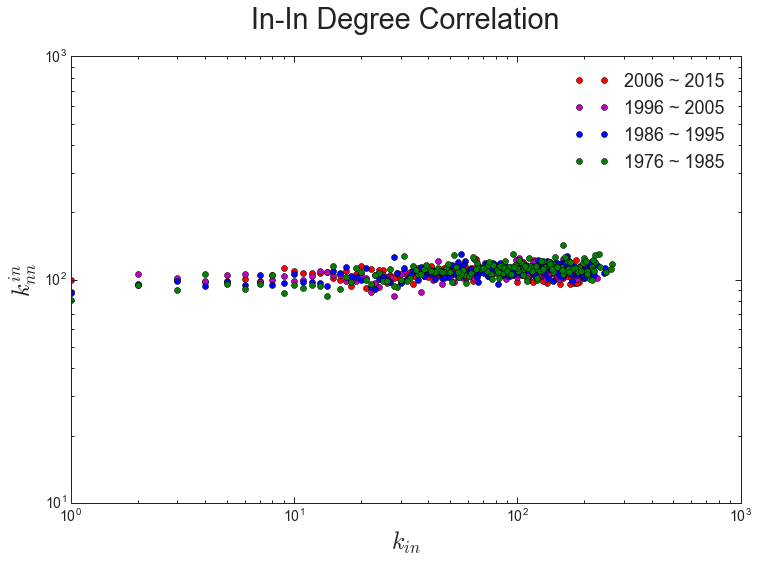

In [146]:
'''in-degree in-degree correlation'''
fig = plt.figure(figsize=(12,8))

x1, y1 = degree_correlation_fuction(G1506, source='in', target='in', weight=None)
plt.loglog(x1, y1, marker='o', color='r', linestyle='None', label='2006 ~ 2015')

x2, y2 = degree_correlation_fuction(G0596, source='in', target='in', weight=None)
plt.loglog(x2, y2, marker='o', color='m', linestyle='None', label='1996 ~ 2005')

x3, y3 = degree_correlation_fuction(G9586, source='in', target='in', weight=None)
plt.loglog(x3, y3, marker='o', color='blue', linestyle='None', label='1986 ~ 1995')

x4, y4 = degree_correlation_fuction(G8576, source='in', target='in', weight=None)
plt.loglog(x4, y4, marker='o', color='green', linestyle='None', label='1976 ~ 1985')

plt.legend(frameon=False, prop={'size':18}, loc=1)
plt.title('In-In Degree Correlation', y=1.05)
plt.xlabel('$k_{in}$')
plt.ylabel('$k_{nn}^{in}$')

plt.show()

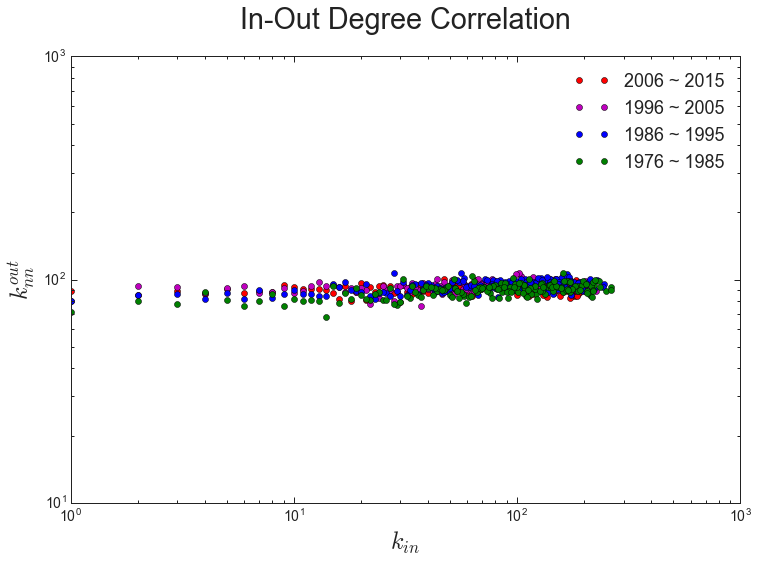

In [147]:
'''in-degree out-degree correlation'''
fig = plt.figure(figsize=(12,8))

x1, y1 = degree_correlation_fuction(G1506, source='in', target='out', weight=None)
plt.loglog(x1, y1, marker='o', color='r', linestyle='None', label='2006 ~ 2015')

x2, y2 = degree_correlation_fuction(G0596, source='in', target='out', weight=None)
plt.loglog(x2, y2, marker='o', color='m', linestyle='None', label='1996 ~ 2005')

x3, y3 = degree_correlation_fuction(G9586, source='in', target='out', weight=None)
plt.loglog(x3, y3, marker='o', color='blue', linestyle='None', label='1986 ~ 1995')

x4, y4 = degree_correlation_fuction(G8576, source='in', target='out', weight=None)
plt.loglog(x4, y4, marker='o', color='green', linestyle='None', label='1976 ~ 1985')

plt.legend(frameon=False, prop={'size':18}, loc=1)
plt.title('In-Out Degree Correlation', y=1.05)
plt.xlabel('$k_{in}$')
plt.ylabel('$k_{nn}^{out}$')

plt.show()

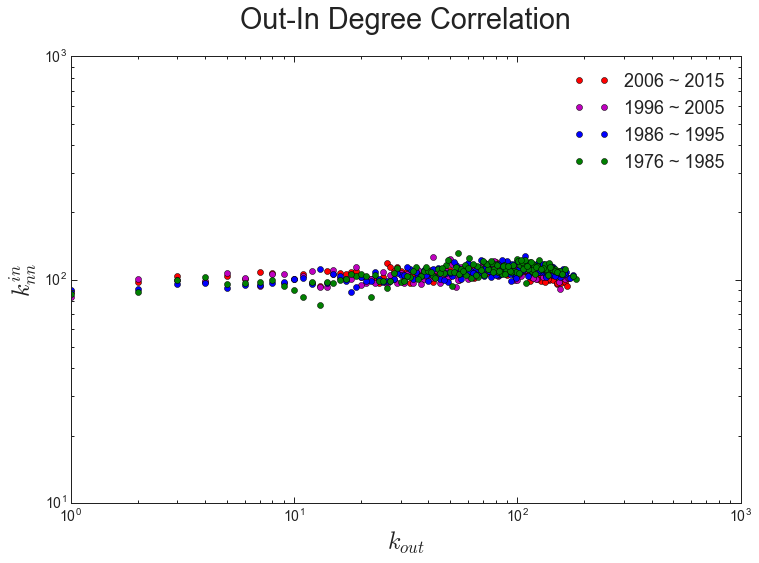

In [148]:
'''out-degree in-degree correlation'''
fig = plt.figure(figsize=(12,8))

x1, y1 = degree_correlation_fuction(G1506, source='out', target='in', weight=None)
plt.loglog(x1, y1, marker='o', color='r', linestyle='None', label='2006 ~ 2015')

x2, y2 = degree_correlation_fuction(G0596, source='out', target='in', weight=None)
plt.loglog(x2, y2, marker='o', color='m', linestyle='None', label='1996 ~ 2005')

x3, y3 = degree_correlation_fuction(G9586, source='out', target='in', weight=None)
plt.loglog(x3, y3, marker='o', color='blue', linestyle='None', label='1986 ~ 1995')

x4, y4 = degree_correlation_fuction(G8576, source='out', target='in', weight=None)
plt.loglog(x4, y4, marker='o', color='green', linestyle='None', label='1976 ~ 1985')

plt.legend(frameon=False, prop={'size':18}, loc=1)
plt.title('Out-In Degree Correlation', y=1.05)
plt.xlabel('$k_{out}$')
plt.ylabel('$k_{nn}^{in}$')

plt.show()

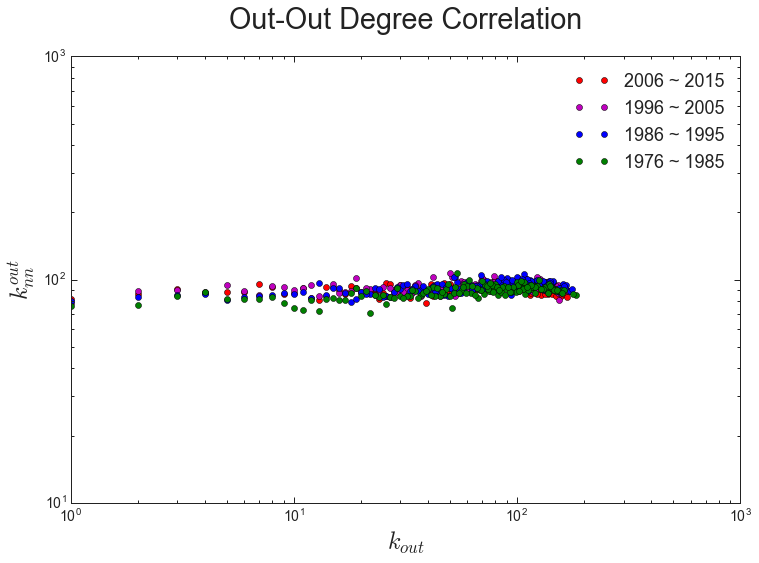

In [149]:
'''out-degree out-degree correlation'''
fig = plt.figure(figsize=(12,8))

x1, y1 = degree_correlation_fuction(G1506, source='out', target='out', weight=None)
plt.loglog(x1, y1, marker='o', color='r', linestyle='None', label='2006 ~ 2015')

x2, y2 = degree_correlation_fuction(G0596, source='out', target='out', weight=None)
plt.loglog(x2, y2, marker='o', color='m', linestyle='None', label='1996 ~ 2005')

x3, y3 = degree_correlation_fuction(G9586, source='out', target='out', weight=None)
plt.loglog(x3, y3, marker='o', color='blue', linestyle='None', label='1986 ~ 1995')

x4, y4 = degree_correlation_fuction(G8576, source='out', target='out', weight=None)
plt.loglog(x4, y4, marker='o', color='green', linestyle='None', label='1976 ~ 1985')

plt.legend(frameon=False, prop={'size':18}, loc=1)
plt.title('Out-Out Degree Correlation', y=1.05)
plt.xlabel('$k_{out}$')
plt.ylabel('$k_{nn}^{out}$')

plt.show()

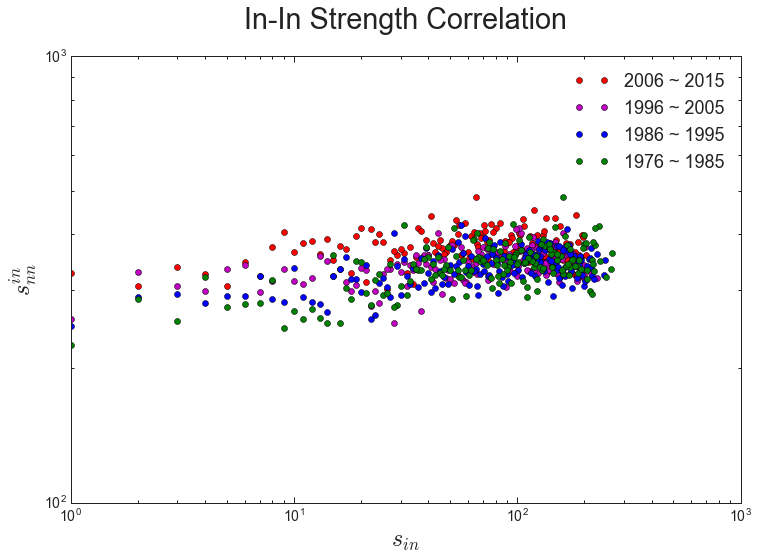

In [151]:
'''in-strength in-strength correlation'''
fig = plt.figure(figsize=(12,8))

x1, y1 = degree_correlation_fuction(G1506, source='in', target='in', weight='loses')
plt.loglog(x1, y1, marker='o', color='r', linestyle='None', label='2006 ~ 2015')

x2, y2 = degree_correlation_fuction(G0596, source='in', target='in', weight='loses')
plt.loglog(x2, y2, marker='o', color='m', linestyle='None', label='1996 ~ 2005')

x3, y3 = degree_correlation_fuction(G9586, source='in', target='in', weight='loses')
plt.loglog(x3, y3, marker='o', color='blue', linestyle='None', label='1986 ~ 1995')

x4, y4 = degree_correlation_fuction(G8576, source='in', target='in', weight='loses')
plt.loglog(x4, y4, marker='o', color='green', linestyle='None', label='1976 ~ 1985')

plt.legend(frameon=False, prop={'size':18}, loc=1)
plt.title('In-In Strength Correlation', y=1.05)
plt.xlabel('$s_{in}$')
plt.ylabel('$s_{nn}^{in}$')

plt.show()

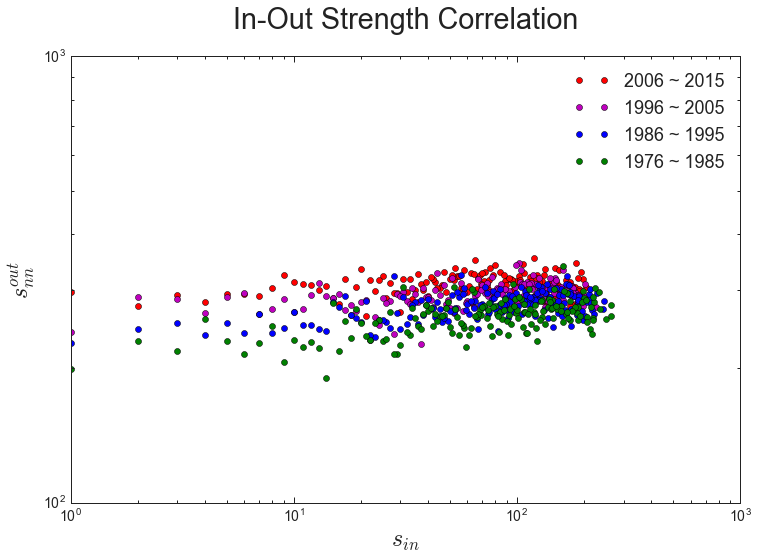

In [150]:
'''in-strength out-strength correlation'''
fig = plt.figure(figsize=(12,8))

x1, y1 = degree_correlation_fuction(G1506, source='in', target='out', weight='loses')
plt.loglog(x1, y1, marker='o', color='r', linestyle='None', label='2006 ~ 2015')

x2, y2 = degree_correlation_fuction(G0596, source='in', target='out', weight='loses')
plt.loglog(x2, y2, marker='o', color='m', linestyle='None', label='1996 ~ 2005')

x3, y3 = degree_correlation_fuction(G9586, source='in', target='out', weight='loses')
plt.loglog(x3, y3, marker='o', color='blue', linestyle='None', label='1986 ~ 1995')

x4, y4 = degree_correlation_fuction(G8576, source='in', target='out', weight='loses')
plt.loglog(x4, y4, marker='o', color='green', linestyle='None', label='1976 ~ 1985')

plt.legend(frameon=False, prop={'size':18}, loc=1)
plt.title('In-Out Strength Correlation', y=1.05)
plt.xlabel('$s_{in}$')
plt.ylabel('$s_{nn}^{out}$')

plt.show()

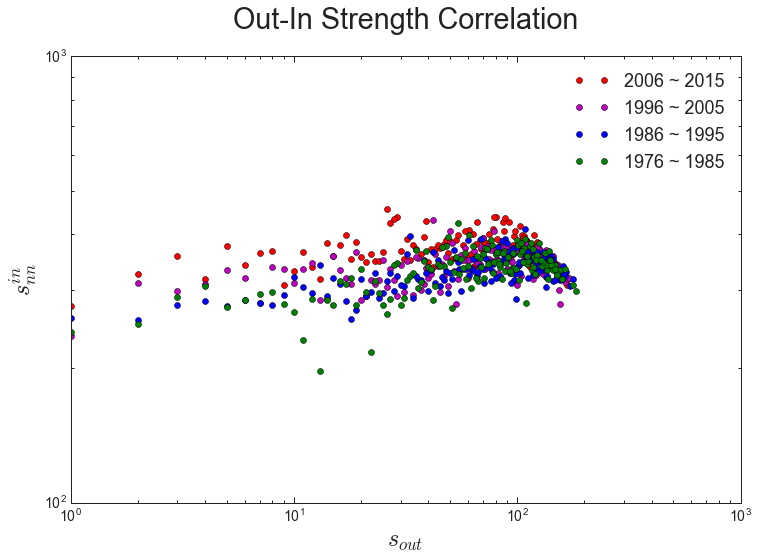

In [152]:
'''out-strength in-strength correlation'''
fig = plt.figure(figsize=(12,8))

x1, y1 = degree_correlation_fuction(G1506, source='out', target='in', weight='loses')
plt.loglog(x1, y1, marker='o', color='r', linestyle='None', label='2006 ~ 2015')

x2, y2 = degree_correlation_fuction(G0596, source='out', target='in', weight='loses')
plt.loglog(x2, y2, marker='o', color='m', linestyle='None', label='1996 ~ 2005')

x3, y3 = degree_correlation_fuction(G9586, source='out', target='in', weight='loses')
plt.loglog(x3, y3, marker='o', color='blue', linestyle='None', label='1986 ~ 1995')

x4, y4 = degree_correlation_fuction(G8576, source='out', target='in', weight='loses')
plt.loglog(x4, y4, marker='o', color='green', linestyle='None', label='1976 ~ 1985')

plt.legend(frameon=False, prop={'size':18}, loc=1)
plt.title('Out-In Strength Correlation', y=1.05)
plt.xlabel('$s_{out}$')
plt.ylabel('$s_{nn}^{in}$')

plt.show()

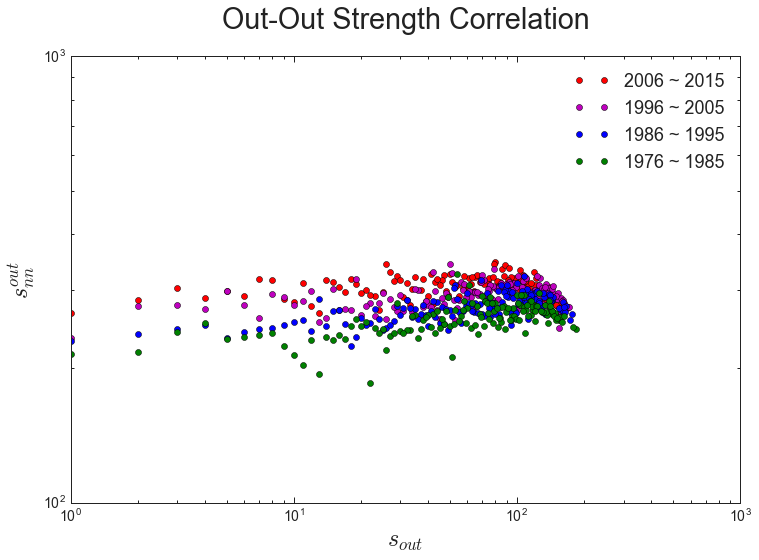

In [153]:
'''out-strength out-strength correlation'''
fig = plt.figure(figsize=(12,8))

x1, y1 = degree_correlation_fuction(G1506, source='out', target='out', weight='loses')
plt.loglog(x1, y1, marker='o', color='r', linestyle='None', label='2006 ~ 2015')

x2, y2 = degree_correlation_fuction(G0596, source='out', target='out', weight='loses')
plt.loglog(x2, y2, marker='o', color='m', linestyle='None', label='1996 ~ 2005')

x3, y3 = degree_correlation_fuction(G9586, source='out', target='out', weight='loses')
plt.loglog(x3, y3, marker='o', color='blue', linestyle='None', label='1986 ~ 1995')

x4, y4 = degree_correlation_fuction(G8576, source='out', target='out', weight='loses')
plt.loglog(x4, y4, marker='o', color='green', linestyle='None', label='1976 ~ 1985')

plt.legend(frameon=False, prop={'size':18}, loc=1)
plt.title('Out-Out Strength Correlation', y=1.05)
plt.xlabel('$s_{out}$')
plt.ylabel('$s_{nn}^{out}$')

plt.show()

In [145]:
'''clustering coefficient as a function of degree'''


'clustering coefficient as a function of degree'